<a href="https://colab.research.google.com/github/Basantallam/unilm/blob/master/DiT_FineTuned_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# **Installations**

In [ ]:
!pip install transformers

     |████████████████████████████████| 4.2 MB 7.0 MB/s 
     |████████████████████████████████| 596 kB 58.5 MB/s 
     |████████████████████████████████| 84 kB 3.5 MB/s 
     |████████████████████████████████| 6.6 MB 57.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!pip install Image

     |████████████████████████████████| 7.9 MB 7.5 MB/s 
  Created wheel for Image: filename=image-1.5.33-py2.py3-none-any.whl size=19496 sha256=01f960996d7a499070c3ccfc9b1c717827a3e1d51a8fca719d24a0605548d574
  Stored in directory: /root/.cache/pip/wheels/56/88/e6/897194cfe8c08a8b9afd881d3bf53d102e13fa39607d721383
Successfully built Image


In [ ]:
!pip install pillow

In [ ]:
!pip install torch

# **Importing Dataset**

In [ ]:
import os
list_of_test_image_paths=os.listdir('/content/drive/MyDrive/Bachelor/Datasets/test_images')
print(len(os.listdir('/content/drive/MyDrive/Bachelor/Datasets/test_images')))


40000


In [ ]:
#creating ground truth dictionary
ground_truth ={}
with open('/content/drive/MyDrive/Bachelor/Datasets/test.txt','r') as file:  
    # reading each line    
    for line in file:
        # reading each word   
        x=line.replace(' ','/').replace('\n','/').split('/')
        #print(x)
        key=x[4]+"_"+x[5]
        value=x[6]
        ground_truth[key]=value
print(ground_truth)
print(type(ground_truth))
print(len(ground_truth))

{'rge31d00_503210033+-0034.tif': '3', 'cej80d00_517306722+-6724.tif': '3', 'mrr36d00_50603620-3621.tif': '14', 'gtu29c00_2084573574a.tif': '2', 'hof08d00_2071783492.tif': '9', 'xab71f00_1002977593_1002977622.tif': '6', 'oks31f00_0001437969.tif': '13', 'jto61f00_2050283643.tif': '8', 'hjg89e00_0000049717.tif': '0', 'gtl97d00_2063755082.tif': '9', 'ofx31e00_85330046.tif': '8', 'ktv71a00_2057469141_2057469144.tif': '7', 'qzr9aa00_10430639.tif': '13', 'vym69d00_500722244.tif': '13', 'ypg33e00_2063120185.tif': '5', 'dpa59e00_2023179428.tif': '1', 'tyy84e00_1000322531.tif': '15', 'hkj93e00_2049201624_2049201626.tif': '13', 'dzx02f00_ton01613.93_ton01613.94.tif': '9', 'vtq28e00_1000843378.tif': '15', 'zns95d00_50471472-1473.tif': '7', 'qlf80f00_0011920400.tif': '7', 'tnv64e00_1000116636_1000116649.tif': '6', 'dbv31c00_2085726239.tif': '2', 'wcj84a00_2500072242_2247.tif': '13', 'hrx99c00_50300877-0893.tif': '5', 'jrs92a00_518740346+-0346.tif': '0', 'rst53f00_0001220062.tif': '0', 'gzl07e00_205

In [ ]:
print(ground_truth)

{'rge31d00_503210033+-0034.tif': '3', 'cej80d00_517306722+-6724.tif': '3', 'mrr36d00_50603620-3621.tif': '14', 'gtu29c00_2084573574a.tif': '2', 'hof08d00_2071783492.tif': '9', 'xab71f00_1002977593_1002977622.tif': '6', 'oks31f00_0001437969.tif': '13', 'jto61f00_2050283643.tif': '8', 'hjg89e00_0000049717.tif': '0', 'gtl97d00_2063755082.tif': '9', 'ofx31e00_85330046.tif': '8', 'ktv71a00_2057469141_2057469144.tif': '7', 'qzr9aa00_10430639.tif': '13', 'vym69d00_500722244.tif': '13', 'ypg33e00_2063120185.tif': '5', 'dpa59e00_2023179428.tif': '1', 'tyy84e00_1000322531.tif': '15', 'hkj93e00_2049201624_2049201626.tif': '13', 'dzx02f00_ton01613.93_ton01613.94.tif': '9', 'vtq28e00_1000843378.tif': '15', 'zns95d00_50471472-1473.tif': '7', 'qlf80f00_0011920400.tif': '7', 'tnv64e00_1000116636_1000116649.tif': '6', 'dbv31c00_2085726239.tif': '2', 'wcj84a00_2500072242_2247.tif': '13', 'hrx99c00_50300877-0893.tif': '5', 'jrs92a00_518740346+-0346.tif': '0', 'rst53f00_0001220062.tif': '0', 'gzl07e00_205

# **Importing Model**

In [ ]:
from transformers import AutoFeatureExtractor, AutoModelForImageClassification
import torch
from PIL import Image
# {0: 'letter', 1: 'form', 2: 'email', 3: 'handwritten', 4: 'advertisement', 5: 'scientific report', 
# 6: 'scientific publication', 7: 'specification', 8: 'file folder', 9: 'news article', 10: 'budget',
# 11: 'invoice', 12: 'presentation', 13: 'questionnaire', 14: 'resume', 15: 'memo'}

feature_extractor = AutoFeatureExtractor.from_pretrained("microsoft/dit-large-finetuned-rvlcdip")
model = AutoModelForImageClassification.from_pretrained("microsoft/dit-large-finetuned-rvlcdip")





Downloading:   0%|          | 0.00/302 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.75k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.13G [00:00<?, ?B/s]

# **Prediction**

In [ ]:
max=400

In [ ]:
x = 0
import math
import numpy as np
predictions={}
#print(type(predictions))
list_of_names=os.listdir('/content/drive/MyDrive/Bachelor/Datasets/test_images')
print(list_of_names)
pred_prob=np.zeros((max, 16))
for image in list_of_names:
    inputs = feature_extractor(images=Image.open(os.path.join('/content/drive/MyDrive/Bachelor/Datasets/test_images',image)).convert('RGB'), return_tensors="pt")
    outputs = model(**inputs)
    logits = outputs.logits
    # model predicts one of the 16 RVL-CDIP classes
    #print("logits ",logits)
    odds=[]
    prob_dist=[]
    tensor1 = torch.tensor(logits[0],requires_grad=True)
    e = np.exp(tensor1.detach().numpy())
    prob_dist=(e / e.sum())
    #print(type(prob_dist))
    pred_prob[x] = prob_dist

    #print("logits.argmax ",logits.argmax(-1))
    #print("prob dist",prob_dist)
    predicted_class_idx = logits.argmax(-1).item()
    #print(predicted_class_idx," ",image)
    #print(image)

    predictions[image]=predicted_class_idx
    #print(x)
    x=x+1

    #print("Predicted class:", model.config.id2label[predicted_class_idx])
    if x==max:
      break

['yxh63a00_507199547+-9549.tif', 'jyz31c00_2085752528a.tif', 'jyg62c00_2077108817.tif', 'xbc2aa00_10051857_10051862.tif', 'eyv16d00_50094919-4919.tif', 'kwn42d00_2056168489.tif', 'xtk75d00_503973123_503973124.tif', 'esu86d00_tcal0288995.tif', 'med6aa00_11309356_11309358.tif', 'kpv95d00_50477394-7395.tif', 'fgo14c00_2069722356.tif', 'png71f00_2001114781_2001114783.tif', 'bmr20d00_524557796+-7813.tif', 'gwc50f00_0000264818.tif', 'usx00a00_10324837_10324848.tif', 'qlg93c00_2060910779_0780.tif', 'pen71a00_2057443581_2057443582.tif', 'qpc10d00_50366022-6022.tif', 'fmq11d00_522718764+-8769.tif', 'lao73c00_2065575501.tif', 'vcm70e00_89518666.tif', 'hnb43f00_0000490161.tif', 'ghw15a00_528407323+-7323.tif', 'ruo94a00_2065576404_6413.tif', 'wvd24d00_507643958.tif', 'dzu21d00_518291758+-1760.tif', 'rze31d00_504739124+-9127.tif', 'lyc95a00_500217954+-7954.tif', 'dez76e00_2041599302_2041599308.tif', 'ebb90f00_0011900509.tif', 'qzs62e00_2040214440_2040214442.tif', 'fux5aa00_11301752.tif', 'dxn11d00_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [ ]:
with open('/content/drive/MyDrive/Bachelor/Datasets/test.txt','r') as fp:
    x = len(fp.readlines())
    print('Total lines of test labels:', x) 

Total lines of test labels: 40000


In [ ]:
for key in ground_truth.keys():
    if key not in predictions.keys():
      print(key," is missing in predictions")

In [ ]:
print(type(ground_truth))
print(ground_truth)

<class 'dict'>
{'rge31d00_503210033+-0034.tif': '3', 'cej80d00_517306722+-6724.tif': '3', 'mrr36d00_50603620-3621.tif': '14', 'gtu29c00_2084573574a.tif': '2', 'hof08d00_2071783492.tif': '9', 'xab71f00_1002977593_1002977622.tif': '6', 'oks31f00_0001437969.tif': '13', 'jto61f00_2050283643.tif': '8', 'hjg89e00_0000049717.tif': '0', 'gtl97d00_2063755082.tif': '9', 'ofx31e00_85330046.tif': '8', 'ktv71a00_2057469141_2057469144.tif': '7', 'qzr9aa00_10430639.tif': '13', 'vym69d00_500722244.tif': '13', 'ypg33e00_2063120185.tif': '5', 'dpa59e00_2023179428.tif': '1', 'tyy84e00_1000322531.tif': '15', 'hkj93e00_2049201624_2049201626.tif': '13', 'dzx02f00_ton01613.93_ton01613.94.tif': '9', 'vtq28e00_1000843378.tif': '15', 'zns95d00_50471472-1473.tif': '7', 'qlf80f00_0011920400.tif': '7', 'tnv64e00_1000116636_1000116649.tif': '6', 'dbv31c00_2085726239.tif': '2', 'wcj84a00_2500072242_2247.tif': '13', 'hrx99c00_50300877-0893.tif': '5', 'jrs92a00_518740346+-0346.tif': '0', 'rst53f00_0001220062.tif': '0'

In [ ]:
print(predictions)
print(type(predictions))

{'yxh63a00_507199547+-9549.tif': 0, 'jyz31c00_2085752528a.tif': 2, 'jyg62c00_2077108817.tif': 1, 'xbc2aa00_10051857_10051862.tif': 6, 'eyv16d00_50094919-4919.tif': 0, 'kwn42d00_2056168489.tif': 11, 'xtk75d00_503973123_503973124.tif': 0, 'esu86d00_tcal0288995.tif': 10, 'med6aa00_11309356_11309358.tif': 6, 'kpv95d00_50477394-7395.tif': 14, 'fgo14c00_2069722356.tif': 7, 'png71f00_2001114781_2001114783.tif': 5, 'bmr20d00_524557796+-7813.tif': 11, 'gwc50f00_0000264818.tif': 15, 'usx00a00_10324837_10324848.tif': 6, 'qlg93c00_2060910779_0780.tif': 7, 'pen71a00_2057443581_2057443582.tif': 7, 'qpc10d00_50366022-6022.tif': 14, 'fmq11d00_522718764+-8769.tif': 3, 'lao73c00_2065575501.tif': 1, 'vcm70e00_89518666.tif': 8, 'hnb43f00_0000490161.tif': 13, 'ghw15a00_528407323+-7323.tif': 2, 'ruo94a00_2065576404_6413.tif': 13, 'wvd24d00_507643958.tif': 1, 'dzu21d00_518291758+-1760.tif': 3, 'rze31d00_504739124+-9127.tif': 3, 'lyc95a00_500217954+-7954.tif': 0, 'dez76e00_2041599302_2041599308.tif': 0, 'ebb9

In [ ]:
print(ground_truth.keys())
print(predictions.keys())
counter=0
for key in predictions.keys():
    if key in ground_truth.keys():
      counter=counter+1
print(counter," keys are common")

dict_keys(['rge31d00_503210033+-0034.tif', 'cej80d00_517306722+-6724.tif', 'mrr36d00_50603620-3621.tif', 'gtu29c00_2084573574a.tif', 'hof08d00_2071783492.tif', 'xab71f00_1002977593_1002977622.tif', 'oks31f00_0001437969.tif', 'jto61f00_2050283643.tif', 'hjg89e00_0000049717.tif', 'gtl97d00_2063755082.tif', 'ofx31e00_85330046.tif', 'ktv71a00_2057469141_2057469144.tif', 'qzr9aa00_10430639.tif', 'vym69d00_500722244.tif', 'ypg33e00_2063120185.tif', 'dpa59e00_2023179428.tif', 'tyy84e00_1000322531.tif', 'hkj93e00_2049201624_2049201626.tif', 'dzx02f00_ton01613.93_ton01613.94.tif', 'vtq28e00_1000843378.tif', 'zns95d00_50471472-1473.tif', 'qlf80f00_0011920400.tif', 'tnv64e00_1000116636_1000116649.tif', 'dbv31c00_2085726239.tif', 'wcj84a00_2500072242_2247.tif', 'hrx99c00_50300877-0893.tif', 'jrs92a00_518740346+-0346.tif', 'rst53f00_0001220062.tif', 'gzl07e00_2057996570.tif', 'ila10e00_91511089.tif', 'fcl54f00_0060341198.tif', 'top52e00_2057670781.tif', 'fnk23d00_513161442.tif', 'oij22c00_208527207

In [ ]:
y_pred=[]
y_test=[]
for key in predictions.keys():
  y_test.append(eval(ground_truth[key]))
  y_pred.append(predictions[key])
print(y_test)
print(y_pred)

[0, 2, 1, 6, 0, 5, 0, 10, 6, 14, 7, 5, 1, 15, 6, 7, 7, 14, 3, 1, 8, 8, 2, 13, 1, 3, 3, 0, 0, 12, 13, 14, 3, 9, 2, 10, 12, 6, 3, 1, 6, 13, 8, 12, 4, 12, 1, 6, 1, 4, 5, 4, 8, 14, 7, 11, 3, 15, 14, 2, 13, 5, 10, 15, 4, 15, 2, 11, 7, 10, 10, 0, 10, 15, 0, 4, 4, 12, 6, 14, 9, 12, 13, 10, 9, 3, 2, 9, 11, 1, 8, 5, 9, 14, 1, 7, 7, 6, 15, 5, 13, 2, 5, 12, 2, 4, 0, 12, 8, 5, 14, 5, 5, 10, 2, 2, 3, 12, 8, 0, 1, 4, 0, 1, 12, 14, 11, 13, 2, 6, 2, 10, 2, 4, 13, 3, 3, 11, 10, 3, 12, 13, 6, 3, 4, 7, 9, 5, 11, 11, 14, 3, 8, 9, 0, 9, 11, 13, 11, 5, 10, 9, 1, 7, 13, 10, 15, 7, 11, 15, 14, 6, 10, 1, 9, 7, 2, 6, 4, 6, 7, 11, 3, 8, 13, 11, 2, 7, 2, 15, 12, 11, 2, 3, 1, 4, 5, 15, 2, 9, 6, 9, 10, 4, 2, 11, 2, 2, 3, 11, 12, 15, 11, 4, 10, 3, 14, 12, 1, 14, 13, 4, 8, 15, 1, 14, 8, 1, 14, 10, 1, 0, 11, 9, 5, 2, 9, 7, 14, 6, 0, 8, 7, 12, 0, 4, 15, 1, 5, 14, 3, 9, 5, 10, 4, 7, 4, 15, 11, 14, 14, 12, 9, 8, 6, 12, 0, 1, 11, 12, 3, 0, 3, 1, 11, 10, 9, 12, 8, 10, 6, 5, 7, 5, 8, 14, 14, 8, 0, 12, 1, 6, 0, 6, 9, 6, 4, 1

In [ ]:
matrix=[ [0]*16 for i in range(16)]
for key in predictions.keys():
    if key in ground_truth.keys():
        #print(ground_truth[key]," ",predictions[key])
        matrix[int(ground_truth[key])][int(predictions[key])]=matrix[int(ground_truth[key])][int(predictions[key])]+1


# **Evaluation Metrics**


### **Confusion Matrix**

In [ ]:
from pandas import *
print(DataFrame(matrix))


    0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15
0   24   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
1    1  20   0   0   0   0   0   0   0   0   0   4   0   0   0   0
2    0   0  27   0   0   0   0   0   0   0   0   0   0   0   0   0
3    0   1   0  25   0   0   0   0   0   0   0   0   0   0   0   0
4    0   0   0   0  20   0   0   0   0   1   0   0   0   0   0   0
5    0   0   0   0   0  23   0   0   0   0   1   1   1   0   0   1
6    0   0   1   0   0   0  26   0   0   0   0   0   0   0   0   0
7    0   0   0   1   0   0   1  21   0   0   0   0   0   0   0   0
8    0   0   0   0   0   0   0   0  25   0   0   0   0   1   0   0
9    1   0   0   0   0   0   0   0   0  23   0   0   2   1   0   0
10   0   0   0   0   0   1   0   0   0   0  20   2   0   0   0   0
11   0   3   0   0   0   0   0   0   0   0   1  21   0   0   0   0
12   0   0   0   0   1   0   0   0   0   0   1   0  24   1   0   0
13   0   1   0   0   0   0   0   0   0   0   0   0   0  20   0

### AUC-ROC 

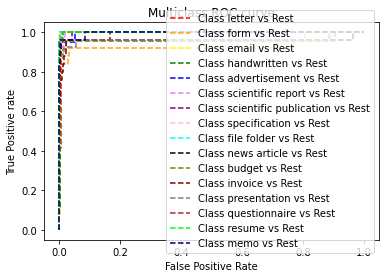

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


# each number corresponds to a class
#print(y_pred)

# probability of this datapoint being in each of the classes
#print(pred_prob)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

# todo: make it 16
n_class = 16

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    

plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Class letter vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='orange', label='Class form vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='yellow', label='Class email vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='green', label='Class handwritten vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='blue', label='Class advertisement vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='violet', label='Class scientific report vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='purple', label='Class scientific publication vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='pink', label='Class specification vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='--',color='cyan', label='Class file folder vs Rest')
plt.plot(fpr[9], tpr[9], linestyle='--',color='black', label='Class news article vs Rest')
plt.plot(fpr[10], tpr[10], linestyle='--',color='olive', label='Class budget vs Rest')
plt.plot(fpr[11], tpr[11], linestyle='--',color='maroon', label='Class invoice vs Rest')
plt.plot(fpr[12], tpr[12], linestyle='--',color='gray', label='Class presentation vs Rest')
plt.plot(fpr[13], tpr[13], linestyle='--',color='brown', label='Class questionnaire vs Rest')
plt.plot(fpr[14], tpr[14], linestyle='--',color='lime', label='Class resume vs Rest')
plt.plot(fpr[15], tpr[15], linestyle='--',color='navy', label='Class memo vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='right')
plt.savefig('Multiclass ROC',dpi=300);    

In [ ]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(type(['letter','form','email','handwritten','advertisement', 'scientific report', 'scientific publication', 'specification','file folder', 'news article', 'budget','invoice', 'presentation', 'questionnaire','resume','memo']))
print(classification_report(y_test, y_pred))

Confusion Matrix

[[24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1 20  0  0  0  0  0  0  0  0  0  4  0  0  0  0]
 [ 0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0 25  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0 23  0  0  0  0  1  1  1  0  0  1]
 [ 0  0  1  0  0  0 26  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  1 21  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 25  0  0  0  0  1  0  0]
 [ 1  0  0  0  0  0  0  0  0 23  0  0  2  1  0  0]
 [ 0  0  0  0  0  1  0  0  0  0 20  2  0  0  0  0]
 [ 0  3  0  0  0  0  0  0  0  0  1 21  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  1  0 24  1  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0 20  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0 26  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0 23]]

Accuracy: 0.92

Micro Precision: 0.92
Micro Recall: 0.92
Micro F1-score: 0.92

Macro Precision: 0.92
Macro Recall: 0.92
Macro F1-score: 0.92

Weighted Precision: 0.